### Imports

In [1]:
# imports
from feature_processor import *
from midas_regression import *

### Feature processing

In [2]:
# path to data folder
path = '/home/romain/clean_codes/2_midas_regression'
# name of file containing monthly features
feature_file = 'features.csv'
# name of file containing the information about monthly data
information_file = 'information.csv'

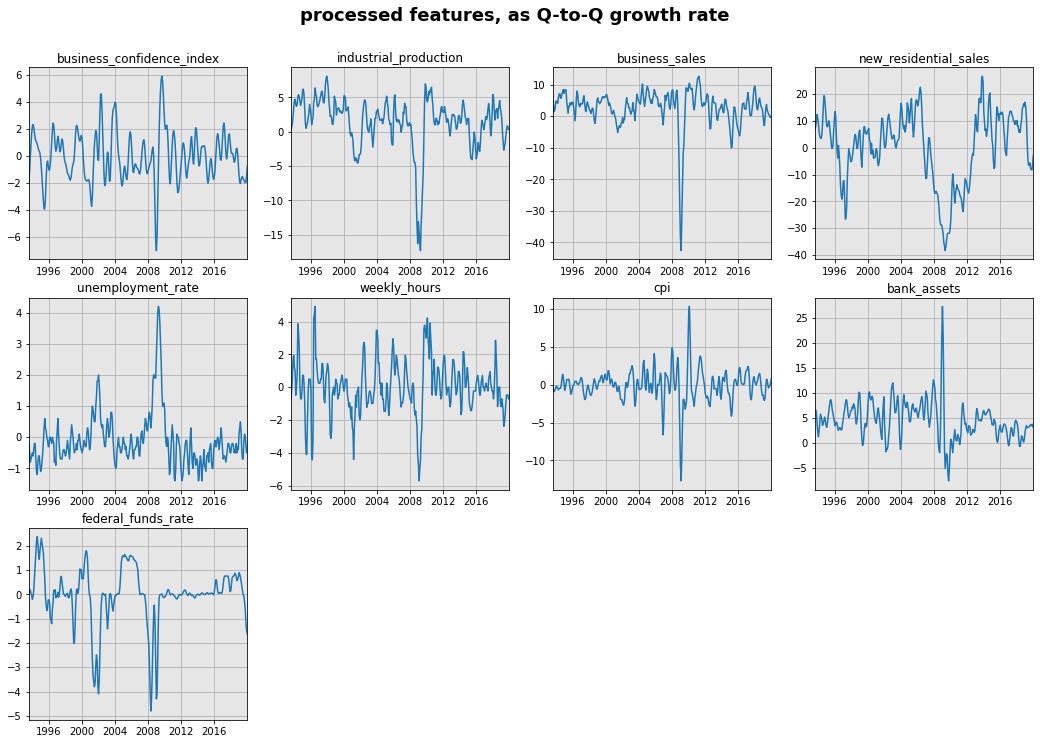

In [3]:
# declare feature processor
fp = FeatureProcessor(path, feature_file, information_file)
# load, process, and plot
fp.data_loader()
fp.data_processor()
fp.plot_processed_data()

In [4]:
# overview of processed features in dataframe
features = fp.processed_features
features.head(6)

,business_confidence_index,industrial_production,business_sales,new_residential_sales,unemployment_rate,weekly_hours,cpi,bank_assets,federal_funds_rate,quarterly_gdp
date,,,,,,,,,,
1993-07-31,-1.95175,0.156402,4.786526,6.969063,-0.2,-0.726083,-0.346079,6.370432,0.04,NaN
1993-08-31,-1.05541,0.662760,2.659460,7.938890,-0.5,-0.238872,-0.690407,6.631697,0.10,NaN
1993-09-30,-0.01763,1.174819,1.526916,10.375088,-0.8,0.489573,-0.896798,6.056690,0.18,0.477315
1993-10-31,0.92615,2.185627,2.437961,12.419164,-0.7,1.702287,-0.688508,3.850384,0.01,NaN
1993-11-30,1.71463,3.472390,4.687599,10.915173,-0.6,1.944119,-0.413161,2.232747,-0.03,NaN
1993-12-31,2.23292,4.516257,4.820045,8.713100,-0.5,1.212714,-0.140156,1.243932,-0.21,1.360113


### Midas regression

In [5]:
# number of periods ahead to predict
h = 4
# number of lags in the low frequency variable
p = 2
# number of lags in the high frequency variables
q = 6
# number of high frequency periods in one low frequency period
m = 3
# choice of the factorisation ('amon' or 'beta')
factorization = 'amon'

In [6]:
# loop over prediction periods (MIDAS must be retrained for each forecast horizon)
prediction_record = []
for i in range(h):
    # declare MIDAS regression
    mr = MidasRegression(feature_dataframe = features, h = i, p = p, q = q, m = m, factorization = factorization)
    # create regressors
    mr.make_regressors()
    # train the model
    mr.train()
    # predict and record
    prediction_record.append(mr.predict())
    
for i in range(h):
    print('The prediction ' + str(i+1) + ' quarters ahead is ' + str(round(prediction_record[i], 3)))

Optimization successful: theta properly estimated.
Optimization successful: theta properly estimated.
Optimization successful: theta properly estimated.
Optimization successful: theta properly estimated.
The prediction 1 quarters ahead is 0.586
The prediction 2 quarters ahead is 0.533
The prediction 3 quarters ahead is 0.467
The prediction 4 quarters ahead is 0.431
